# Data Disponibility Analysis

The objective of this notebook is to check the data availability and test if there is enough observations to go further in the question. <br>

<h3><b>Objectives:<b><br></h3>
<ol>
<li> Check the number of NaN's in <b>GDP</b> ( our response in the future models)</li>
<li> Check the number of NaN's <b>private investment</b> feature (one of our main tests) </li>
<li> Check the number of NaN's <b>public investment</b> feature (one of our main tests) </li>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


df = pd.read_csv('SPcities.csv', decimal=',', encoding='Iso-8859-1', sep=';')

# In this dataset we have years that go beyond our interest, that is 2015, so here I`m going to restrict to the interest

df = df[df.year < 2016]
df.head()

,Unnamed: 0,mun,year,exp_value,imp_value,exp_share,homicid,latroc,estupro,idh,...,pri_year,pri_mun,pri_reais,pri_dolar,mun2,pub_year,pub_mun,pub_value,checkpub,checkpri
0,0,Adamantina,2000,NaN,NaN,NaN,NaN,NaN,NaN,0.721,...,NaN,NaN,NaN,NaN,ADAMANTINA,NaN,NaN,NaN,1,0
1,1,Adamantina,2001,NaN,NaN,NaN,4.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,ADAMANTINA,NaN,NaN,NaN,1,0
2,2,Adamantina,2002,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,ADAMANTINA,NaN,NaN,NaN,1,0
3,3,Adamantina,2003,7509556.0,NaN,"0,027878",1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,ADAMANTINA,NaN,NaN,NaN,1,0
4,4,Adamantina,2004,6864268.0,NaN,"0,019939",4.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,ADAMANTINA,NaN,NaN,NaN,1,0


<h4> 1.Check the number of NaN's in GDP ( our response in the future models) </h4>

In [56]:
data = df[df.mun.notnull()]
missing_features = data.isnull().sum()
missing_features/len(df)

#number of nulls in the features divided by the number of observations

Unnamed: 0        0.000000
mun               0.000000
year              0.000000
exp_value         0.556977
imp_value         0.600484
exp_share         0.557558
homicid           0.444767
latroc            0.829845
estupro           0.350388
idh               0.875000
idh_rank          0.875000
educ_pgraduate    0.875097
life_exp          0.001066
furtos            0.064535
gdp               0.187500
gdp_per           0.187597
area              0.000000
roubos            0.179554
dem_dens          0.000000
value_add         0.187500
ind_value_ad      0.187500
eletric           0.125000
mun_revenue       0.320543
iptu              0.321609
iss               0.321027
icms              0.000000
ipva              0.375000
icms.1            0.375000
veic              0.125000
veic_per          0.125000
jobs              0.000000
jobs_mrev         0.000000
pop               0.000000
pop_cresc         1.000000
pop_urb           0.000000
pop_rur           0.041570
olding            0.000000
u

It seems to have few data with investment information, but idh and education have some problems too

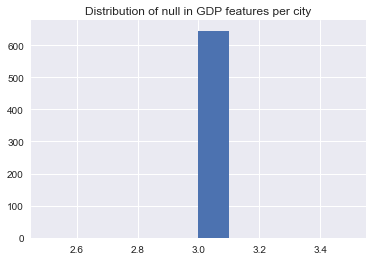

In [54]:
# lets look the distribution of NaN values in different cities 

## GDP
null_gdp = data.gdp.isnull().groupby(data['mun']).sum()

plt.hist(null_gdp)
plt.title('Distribution of null in GDP features per city')

It seems we have the same problem for all cities, so there must be the same years for all of them

In [57]:
n_cities = len(np.unique(data.mun))
null_gdp_year = data.gdp.isnull().groupby(data['year']).sum()


print('Number of unique cities: ', n_cities)
null_gdp_year

Number of unique cities:  645


year
2000    645.0
2001    645.0
2002      0.0
2003      0.0
2004      0.0
2005      0.0
2006      0.0
2007      0.0
2008      0.0
2009      0.0
2010      0.0
2011      0.0
2012      0.0
2013      0.0
2014      0.0
2015    645.0
Name: gdp, dtype: float64

so here we have the problem: in 2000, 2001 and 2015 we have no gdp information, which are going to be droped for sure

<h4> 2.Check the number of NaN's private investment feature (one of our main tests) </h4>

Number of unique cities:  645
Number cities with at least 1 value of private investment:  137
% of cities with value in private investment:  21.240310077519382


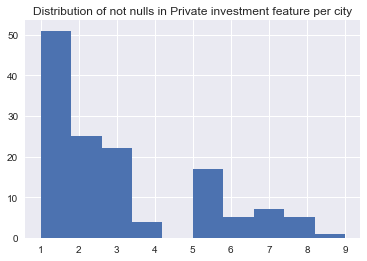

In [63]:
## Private Investment


null_private = data['pri_reais'].notnull().groupby(data['mun']).sum()

# here we need to check in the cities that have some private investment value, how the distribution of NaN looks? 

print('Number of unique cities: ', n_cities)
print('Number cities with at least 1 value of private investment: ', len(null_private[null_private>0]))
print('% of cities with value in private investment: ', len(null_private[null_private>0])/n_cities * 100)

plt.hist(null_private[null_private>0])
plt.title('Distribution of not nulls in Private investment feature per city')

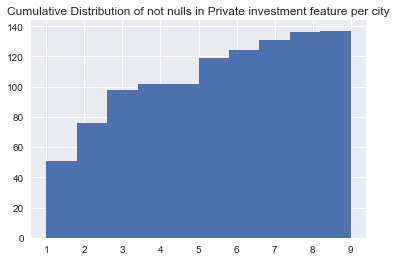

In [62]:
plt.hist(null_private[null_private>0], cumulative=True)
plt.title('Cumulative Distribution of not nulls in Private investment feature per city')

In [41]:
# lets check if there is some concetration in any year that we have at least 1 value for private investment :

null_private_year = data['pri_reais'].isnull().groupby(data['year']).sum()
null_private_year

#count of Nan`s by year

year
2000    645.0
2001    645.0
2002    644.0
2003    645.0
2004    645.0
2005    643.0
2006    643.0
2007    642.0
2008    634.0
2009    633.0
2010    620.0
2011    594.0
2012    575.0
2013    572.0
2014    573.0
2015    571.0
Name: pri_reais, dtype: float64

It seems that the years after 2010 are better in number of not nulls but still we can see that there is a few observations that have more than 3 years with data, which looks very chalenging. 

<h4> 3.Check the number of NaN's public investment feature (one of our main tests) </h4>

Number of unique cities:  645
Number cities with at least 1 value of public investment:  489
% of cities with value in public investment:  75.81395348837209


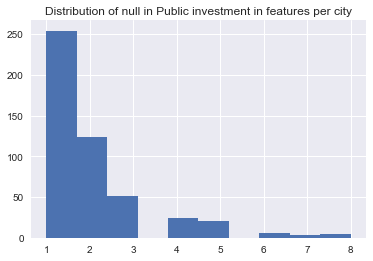

In [64]:
## Public Investment


null_pub = data['pub_value'].notnull().groupby(data['mun']).sum()

# here we need to check in the cities that have some public investment value, how the distribution of NaN looks? 

print('Number of unique cities: ', n_cities)
print('Number cities with at least 1 value of public investment: ', len(null_pub[null_pub >0]))
print('% of cities with value in public investment: ', len(null_pub[null_pub >0])/n_cities * 100)

plt.hist(null_pub[null_pub >0])
plt.title('Distribution of null in Public investment in features per city')

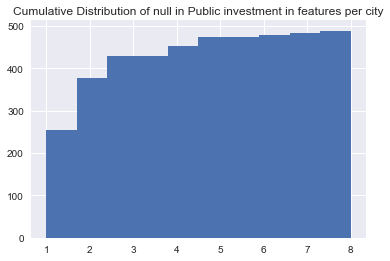

In [65]:
plt.hist(null_pub[null_pub>0], cumulative=True)
plt.title('Cumulative Distribution of null in Public investment in features per city')

In [42]:
# lets check if there is some concetration in any year that we have at least 1 value for public investment :

null_public_year = data['pub_value'].isnull().groupby(data['year']).sum()
null_public_year

#count of Nan`s by year

year
2000    645.0
2001    645.0
2002    645.0
2003    645.0
2004    645.0
2005    645.0
2006    645.0
2007    598.0
2008    603.0
2009    612.0
2010    511.0
2011    556.0
2012    540.0
2013    236.0
2014    545.0
2015    644.0
Name: pub_value, dtype: float64

For the public investment we clearly see that we have much more data, and we can see that the availability is very similar to the private, getting better by the year of 2010. Otherwise we have the same issue where we have just 3 years with heavy investment values.